##Importing libraries

#OBP Implementation

In [153]:
from sklearn.utils import shuffle
# Importing Librarries

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

class Perceptron():
  # Using data

  def __init__(self, data): # special method
    self.data = data
    self.X = data.data
    self.Y= data.target
    self.Feature = data.feature_names
    self.df = pd.DataFrame(data=self.X, columns=self.Feature)
    self.train = 0
    self.test = 0
    self.df['Target'] = self.Y
  
  def Rand(self, size):
    _Rand = np.random.rand(size)
    return _Rand

  def Sigmoid(self, _input):
      _Sigmoid = (2 / (1 + np.exp(-_input)) ) - 1
      return _Sigmoid

  def tanh(self, _input):
      return np.tanh(_input)

  def ReLU(self, _input):
      if _input < 0:
          return 0
      else:
          return 0.01 * _input
      
  def O(self, feature, weight, fcn):
      if fcn == 'sigmoid':
          return self.Sigmoid(np.dot(feature, weight))
      elif fcn == 'tanh':
          return self.tanh(np.dot(feature, weight))
      elif fcn == 'ReLU':
          return self.ReLU(np.dot(feature, weight))
      else:
          return -1
    
  def hyperparameter(self, _learning_rate=0.1, _E_max=1e6, _epoch=50):
    self.w = Rand(self.X.shape[1])
    self.learning_rate = _learning_rate
    self.E_max = _E_max
    self.epoch = _epoch

  def normalize_shuffle(self, _a, _frac = 0):

    scaler = preprocessing.MinMaxScaler()
    a = pd.DataFrame(data=self.data.data, )
    names = a.columns
    d = scaler.fit_transform(a)
    a = pd.DataFrame(d, columns=self.data.feature_names)

    # if _frac != 0:
    #   a = a.sample(frac=_frac).reset_index(drop=True)

    return a

  def shuffle(self, _a, _frac):
    a = _a.sample(frac=_frac).reset_index(drop=True)
    return a


  def train(self, type="full", b=False, train_frac="0.8", shuffled=False, normalize=False, act_func="sigmoid"):

    scaled_df = shuffle(self.df, 1.)

    if type == "full" and b == False:
      n_learning = int(self.X.shape[0])
      print(n_learning)
      e_lst = []

      for j in range(self.epoch):

          E = 0
          for i in range(n_learning):

              o = O(self.X[i], self.w, act_func)
              w += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.X[i])
              E += (0.5 * (Y[i] - o) ** 2)

              print(f"epoch_{j + 1} - input_{i+1} output: {o}")
              print(f"epoch_{j + 1} - input_{i+1} Error: {E}")

              if(E > self.E_max):
                  break
          e_lst.append(E)

      iteration = np.arange(1,self.epoch+1,1)
      plt.plot(iteration, e_lst)

    if type != "full" and b == False:

      self.train = scaled_df.sample(train_frac).reset_index(drop=True)
      self.test = scaled_df.drop(index = self.train.index).reset_index(drop=True)

      n_learning = int(self.X.shape[0])
      # print(n_learning)
      e_lst = []

      for j in range(self.epoch):

          E = 0
          for i in range(n_learning):

              o = O(self.X[i], self.w, act_func)
              w += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.X[i])
              E += (0.5 * (Y[i] - o) ** 2)

              print(f"epoch_{j + 1} - input_{i+1} output: {o}")
              print(f"epoch_{j + 1} - input_{i+1} Error: {E}")

              if(E > self.E_max):
                  break
          e_lst.append(E)

      iteration = np.arange(1,self.epoch+1,1)
      plt.plot(iteration, e_lst)

    if type == "full" and b == True:

      self.df = scaled_df
      self.df["bias"] = -1
      w_bias = self.Rand(self.df.shape[1])
      n_learning = self.df.shape[0]

      n_learning = int(self.X.shape[0])
      e_lst_learn = []
      for j in range(self.epoch):
          E = 0
          for i in range(n_learning):
              o = self.O(self.df.iloc[i], w_bias, act_func)
              w_bias += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.df.iloc[i])
              E += (0.5 * (self.Y[i] - o) ** 2)
      #         print(o)
              print(f"epoch_{j + 1} - input_{i+1}: {E}")
      #         print(w)
              if(E > self.E_max):
                  break
          e_lst_learn.append(E)

      iteration = np.arange(1,self.epoch+1,1)
      plt.plot(iteration, e_lst_learn)

    if type != "full" and b == True:
      
      self.df = scaled_df
      self.df["bias"] = -1
      w_bias = self.Rand(self.df.shape[1])
      n_learning = self.df.shape[0]

      n_learning = int(self.X.shape[0])
      self.train = scaled_df.sample(train_frac).reset_index(drop=True)
      self.test = scaled_df.drop(index = self.train.index).reset_index(drop=True)

      n_learning = int(self.X.shape[0])

      e_lst_learn = []
      for j in range(self.epoch):
          E = 0
          for i in range(n_learning):
              o = O(self.train.iloc[i], w_bias, act_func)
              w_bias += (0.5 * self.learning_rate * (self.Y[i] - o) * (1 - o ** 2) * self.train.iloc[i])
              E += (0.5 * (self.Y[i] - o) ** 2)
      #         print(o)
              print(f"epoch_{j + 1} - input_{i+1}: {E}")
      #         print(w)
              if(E > self.E_max):
                  break
          e_lst_learn.append(E)

      iteration = np.arange(1,epoch+1,1)
      plt.plot(iteration, e_lst_learn)



##Script

In [158]:
a = Perceptron(load_breast_cancer()).hyperparameter(0.1,1e6, 50)
a.train()


AttributeError: ignored

#Functional Implementation

In [1]:
# Importing Librarries

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt


## Loading X, Y from load_breast_cancer() class

In [11]:
# Using data

data = load_breast_cancer()
X = data.data
Y = data.target

Feature = data.feature_names
df = pd.DataFrame(data=X, columns=Feature)
df['Target'] = Y

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


##Functions

In [4]:
# Functions

def Rand(size):
    _Rand = np.random.rand(size)
    return _Rand

def Sigmoid(_input):
    _Sigmoid = (2 / (1 + np.exp(-_input)) ) - 1
    return _Sigmoid

def tanh(_input):
    return np.tanh(_input)

def ReLU(_input):
    if _input < 0:
        return 0
    else:
        return 0.01 * _input
    
def O(feature, weight, fcn):
    if fcn == 'sigmoid':
        return Sigmoid(np.dot(feature, weight))
    elif fcn == 'tanh':
        return tanh(np.dot(feature, weight))
    elif fcn == 'ReLU':
        return ReLU(np.dot(feature, weight))
    else:
        return -1



##Hyper Parameters

In [59]:
# Hyper_params

w = Rand(X.shape[1])
print(w)
learning_rate = 0.1
E_max = 1e6
E = 0
epoch = 50

[0.5769302  0.33222896 0.6105234  0.90179909 0.54135262 0.3630744
 0.92969223 0.71563389 0.21834187 0.86220284 0.18913979 0.22641869
 0.0131541  0.33814551 0.99341486 0.94735399 0.79660831 0.33526025
 0.76865511 0.19835019 0.56336076 0.3754508  0.96346875 0.775585
 0.22995294 0.87818812 0.94616958 0.80733258 0.05030582 0.55175481]


##Without being shuffled and normalized

In [162]:
n_learning = int(np.round(X.shape[0] * 1))

Streaming output truncated to the last 5000 lines.
epoch_42 - input_122: 36.0
epoch_42 - input_123: 36.5
epoch_42 - input_124: 36.5
epoch_42 - input_125: 36.5
epoch_42 - input_126: 36.5
epoch_42 - input_127: 37.0
epoch_42 - input_128: 37.5
epoch_42 - input_129: 37.5
epoch_42 - input_130: 38.0
epoch_42 - input_131: 38.0
epoch_42 - input_132: 38.5
epoch_42 - input_133: 39.0
epoch_42 - input_134: 39.0
epoch_42 - input_135: 39.5
epoch_42 - input_136: 40.0
epoch_42 - input_137: 40.0
epoch_42 - input_138: 40.0
epoch_42 - input_139: 40.5
epoch_42 - input_140: 40.5
epoch_42 - input_141: 40.5
epoch_42 - input_142: 41.0
epoch_42 - input_143: 41.0
epoch_42 - input_144: 41.0
epoch_42 - input_145: 41.0
epoch_42 - input_146: 41.0
epoch_42 - input_147: 41.5
epoch_42 - input_148: 41.5
epoch_42 - input_149: 41.5
epoch_42 - input_150: 41.5
epoch_42 - input_151: 41.5
epoch_42 - input_152: 41.5
epoch_42 - input_153: 41.5
epoch_42 - input_154: 41.5
epoch_42 - input_155: 41.5
epoch_42 - input_156: 41.5
epoc

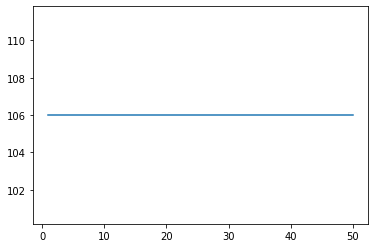

In [60]:

print(n_learning)
e_lst = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(X[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * X[i])
        E += (0.5 * (Y[i] - o) ** 2)
        # print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
        if(E > E_max):
            break
    # e_lst.append(E / n_learning)
    e_lst.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst)

## Normalizing

In [133]:
# normalizing

scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(X)
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=data.feature_names)
scaled_df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


 ## shuffling and reseting indexes

In [159]:
scaled_df = scaled_df.sample(frac=1.).reset_index(drop=True)
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.325098,0.253635,0.308548,0.188844,0.317956,0.128765,0.033271,0.056710,0.279798,0.188290,...,0.268943,0.308102,0.248469,0.132889,0.294063,0.104501,0.064816,0.175395,0.157500,0.110062
1,0.341663,0.365911,0.335982,0.201442,0.331137,0.280412,0.118627,0.151988,0.225253,0.213353,...,0.303095,0.406183,0.307236,0.158106,0.291422,0.306206,0.200639,0.460137,0.191011,0.154401
2,0.057504,0.241123,0.054730,0.024772,0.301255,0.122845,0.037207,0.029409,0.358081,0.317397,...,0.036784,0.264925,0.034115,0.014009,0.386515,0.105180,0.054952,0.088110,0.303568,0.124951
3,0.490747,0.451471,0.464446,0.334931,0.306852,0.133489,0.067737,0.141004,0.254545,0.065501,...,0.424048,0.518390,0.387420,0.253834,0.348874,0.117696,0.096725,0.282990,0.174847,0.066312
4,0.495953,1.000000,0.481031,0.329629,0.410671,0.338691,0.332006,0.437922,0.378283,0.204297,...,0.518677,0.875533,0.452164,0.300531,0.431420,0.335895,0.258866,0.709966,0.253893,0.196248


##Train & Test parameter assignment

In [160]:
train = scaled_df.sample(frac = 0.8).reset_index(drop=True)
test = scaled_df.drop(index = train.index).reset_index(drop=True)
print(train.shape, test.shape)
train.head()
test.head()


(455, 30) (114, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.305694,0.401420,0.292931,0.177943,0.261713,0.125544,0.072868,0.100944,0.365657,0.124473,...,0.284596,0.485874,0.259425,0.148127,0.252460,0.171736,0.166534,0.382131,0.281687,0.107700
1,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,0.080034,...,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
2,0.292442,0.366250,0.278281,0.167635,0.187054,0.102356,0.042174,0.062425,0.329798,0.187869,...,0.233725,0.438166,0.223517,0.113817,0.268309,0.133219,0.061486,0.144158,0.221171,0.126263
3,0.334564,0.589787,0.328865,0.193807,0.421233,0.285933,0.104545,0.213917,0.240909,0.247473,...,0.262184,0.563699,0.247971,0.128170,0.349534,0.193178,0.105911,0.360137,0.135029,0.184770
4,0.416442,0.446398,0.427821,0.271092,0.567572,0.477946,0.499766,0.471123,0.523232,0.491786,...,0.436144,0.492537,0.397878,0.267106,0.755002,0.451349,0.587540,0.698969,0.336882,0.460186


##Training with all data

Streaming output truncated to the last 5000 lines.
epoch_42 - input_122: 16.437325415609067
epoch_42 - input_123: 16.579344416065172
epoch_42 - input_124: 16.637612201606462
epoch_42 - input_125: 16.78182287177897
epoch_42 - input_126: 16.87367558726405
epoch_42 - input_127: 17.063884114271286
epoch_42 - input_128: 17.22070680061923
epoch_42 - input_129: 17.35703349647081
epoch_42 - input_130: 17.55933602957045
epoch_42 - input_131: 17.661284842399887
epoch_42 - input_132: 17.8136804931221
epoch_42 - input_133: 17.86960674193854
epoch_42 - input_134: 17.933922110260493
epoch_42 - input_135: 18.104832410828323
epoch_42 - input_136: 18.237262231531236
epoch_42 - input_137: 18.368813830789392
epoch_42 - input_138: 18.540099840250466
epoch_42 - input_139: 18.68941506183178
epoch_42 - input_140: 18.7740781937382
epoch_42 - input_141: 18.856455197951163
epoch_42 - input_142: 18.921532888259105
epoch_42 - input_143: 19.04147040345442
epoch_42 - input_144: 19.097215924887994
epoch_42 - input_1

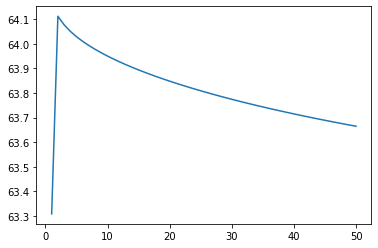

In [163]:
e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(569):
        o = O(scaled_df.iloc[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * scaled_df.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

test and train data

In [137]:
# train
# test
n_learning = train.shape[0]
print(n_learning)

455


##Training with "train" Data

Streaming output truncated to the last 5000 lines.
epoch_40 - input_6: 1.476218786358468
epoch_40 - input_7: 1.7331277048135045
epoch_40 - input_8: 2.0466861781522327
epoch_40 - input_9: 2.297840752137537
epoch_40 - input_10: 2.4336477036619883
epoch_40 - input_11: 2.7035254237285087
epoch_40 - input_12: 3.05020510313426
epoch_40 - input_13: 3.193456673840767
epoch_40 - input_14: 3.3400393775527912
epoch_40 - input_15: 3.559183124420676
epoch_40 - input_16: 3.709178736534538
epoch_40 - input_17: 3.8800399717239387
epoch_40 - input_18: 4.001031660349041
epoch_40 - input_19: 4.243839699255728
epoch_40 - input_20: 4.328705148598594
epoch_40 - input_21: 4.418257784040804
epoch_40 - input_22: 4.528332190854729
epoch_40 - input_23: 4.755155041503817
epoch_40 - input_24: 4.9199419758417875
epoch_40 - input_25: 5.131618694824824
epoch_40 - input_26: 5.3197472358835505
epoch_40 - input_27: 5.529662225467739
epoch_40 - input_28: 5.656694099332319
epoch_40 - input_29: 5.898510346353716
epoch_40 -

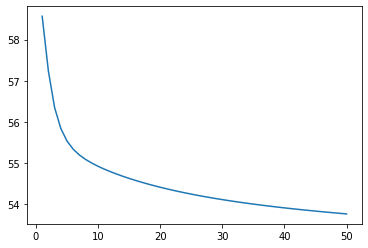

In [138]:
# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(train.iloc[i], w, 'sigmoid')
        w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * train.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

# e_lst_test = []
# for j in range(epoch):
#     E = 0
#     for i in range(n_learning, 569):
#         o = O(scaled_df.iloc[i], w, 'sigmoid')
#         w += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * scaled_df.iloc[i])
#         E += (0.5 * (Y[i] - o) ** 2)
# #         print(o)
#         print(f"epoch_{j + 1} - input_{i+1}: {E}")
# #         print(w)
#         if(E > E_max):
#             break
#     e_lst_test.append(E)

# plt.plot(iteration, e_lst_test)


##Adding bias


**Problem: If we don't shuffle the dataset, the Error is lower than when, the dataset is shuffled**

In [125]:
df_bias = scaled_df
df_bias["bias"] = -1
# df_bias = df_bias.sample(frac=1.).reset_index(drop=True)
w_bias = Rand(df_bias.shape[1])
n_learning = df_bias.shape[0]
n_learning
# w_bias.shape
# df_bias.shape
# df_bias

569

## Training complete dataset with bias

Streaming output truncated to the last 5000 lines.
epoch_42 - input_122: 18.532616265530617
epoch_42 - input_123: 18.736225693447206
epoch_42 - input_124: 18.76546556300881
epoch_42 - input_125: 18.83216932721409
epoch_42 - input_126: 18.90580238200018
epoch_42 - input_127: 19.044864243529545
epoch_42 - input_128: 19.243520952316214
epoch_42 - input_129: 19.29712590191545
epoch_42 - input_130: 19.51631371841656
epoch_42 - input_131: 19.568510750355614
epoch_42 - input_132: 20.021496660859686
epoch_42 - input_133: 20.171404055701764
epoch_42 - input_134: 20.27333243946479
epoch_42 - input_135: 20.523927290703522
epoch_42 - input_136: 20.689723727183715
epoch_42 - input_137: 20.80180650094079
epoch_42 - input_138: 20.851976079850573
epoch_42 - input_139: 21.0424339910097
epoch_42 - input_140: 21.089721077306887
epoch_42 - input_141: 21.12607037793734
epoch_42 - input_142: 21.292754849494155
epoch_42 - input_143: 21.388330475943516
epoch_42 - input_144: 21.427005064381383
epoch_42 - input

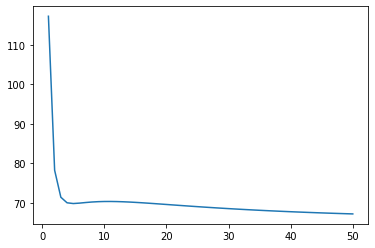

In [165]:
# with bias :


# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(df_bias.iloc[i], w_bias, 'ReLU')
        w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

# e_lst_test = []
# for j in range(epoch):
#     E = 0
#     for i in range(n_learning, 569):
#         o = O(df_bias.iloc[i], w_bias, 'sigmoid')
#         w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
#         E += (0.5 * (Y[i] - o) ** 2)
# #         print(o)
#         print(f"epoch_{j + 1} - input_{i+1}: {E}")
# #         print(w)
#         if(E > E_max):
#             break
#     e_lst_test.append(E / n_learning)

# plt.plot(iteration, e_lst_test)
# plt.xlabel('Epoch number ')
# # plt.grid()

### Train and test assignment for model with bias

In [141]:
df_bias = df_bias.sample(frac=1.).reset_index(drop=True)
train = df_bias.sample(frac = 0.8).reset_index(drop=True)
test = df_bias.drop(index = train.index).reset_index(drop=True)
print(train.shape, test.shape)
train.head()
test.head()
n_learning = train.shape[0]

(455, 31) (114, 31)


##Training "train" datas with bias

Streaming output truncated to the last 5000 lines.
epoch_40 - input_6: 1.5783266010471826
epoch_40 - input_7: 1.8113575363427354
epoch_40 - input_8: 2.0695095343243164
epoch_40 - input_9: 2.257167031893677
epoch_40 - input_10: 2.436122582064355
epoch_40 - input_11: 2.6155641457433725
epoch_40 - input_12: 2.799700751447409
epoch_40 - input_13: 2.803483939300779
epoch_40 - input_14: 2.962029639036441
epoch_40 - input_15: 3.156890888930831
epoch_40 - input_16: 3.280494602979777
epoch_40 - input_17: 3.3418732554383537
epoch_40 - input_18: 3.4237694942089685
epoch_40 - input_19: 3.5342009544466504
epoch_40 - input_20: 3.6597669874280645
epoch_40 - input_21: 3.787373521694156
epoch_40 - input_22: 3.91196043699513
epoch_40 - input_23: 4.015699399641863
epoch_40 - input_24: 4.163424108218551
epoch_40 - input_25: 4.2616228094630815
epoch_40 - input_26: 4.2764166431806565
epoch_40 - input_27: 4.311275986428727
epoch_40 - input_28: 4.398484565714249
epoch_40 - input_29: 4.478814058384307
epoch_40

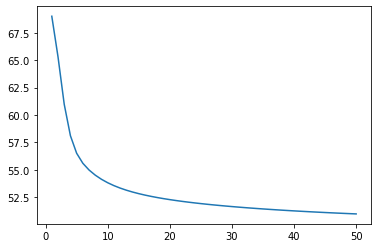

In [142]:
# with bias :


# Training:

e_lst_learn = []
for j in range(epoch):
    E = 0
    for i in range(n_learning):
        o = O(train.iloc[i], w_bias, 'sigmoid')
        w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * train.iloc[i])
        E += (0.5 * (Y[i] - o) ** 2)
#         print(o)
        print(f"epoch_{j + 1} - input_{i+1}: {E}")
#         print(w)
        if(E > E_max):
            break
    e_lst_learn.append(E)

iteration = np.arange(1,epoch+1,1)
plt.plot(iteration, e_lst_learn)

# Test:

# e_lst_test = []
# for j in range(epoch):
#     E = 0
#     for i in range(n_learning, 569):
#         o = O(df_bias.iloc[i], w_bias, 'sigmoid')
#         w_bias += (0.5 * learning_rate * (Y[i] - o) * (1 - o ** 2) * df_bias.iloc[i])
#         E += (0.5 * (Y[i] - o) ** 2)
# #         print(o)
#         print(f"epoch_{j + 1} - input_{i+1}: {E}")
# #         print(w)
#         if(E > E_max):
#             break
#     e_lst_test.append(E / n_learning)

# plt.plot(iteration, e_lst_test)
# plt.xlabel('Epoch number ')
# # plt.grid()